In [1]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_column', None)

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [2]:
zomato=pd.read_csv("C:\\Users\\Sambhu\\Desktop\\Imarticus\\Class Material\\kaggle\\zomato.csv")

In [3]:
zomato

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


# Data cleaning:-

In [4]:
zomato.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

## Droping the unnecessary columns:- 

In [6]:
for i in zomato[['url','address','phone','menu_item','dish_liked','reviews_list','listed_in(city)']]:
    del zomato[i]
    
#zomato.drop(['url','address','phone','menu_item','dish_liked','reviews_list','listed_in(city)'],axis=1,inplace=True)

In [7]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


##  Checking the null values by columns:-

In [8]:
zomato.isnull().sum()

name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
listed_in(type)                   0
dtype: int64

In [9]:
zomato.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


## Renaming columns:- 

In [10]:
zomato=zomato.rename(columns={'name':'restaurant_name','book_table':'booking','rate':'rating','approx_cost(for two people)':'cost','listed_in(type)':'types'})


In [11]:
zomato.head()

,restaurant_name,online_order,booking,rating,votes,location,rest_type,cuisines,cost,types
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


## drop null 


In [12]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   restaurant_name  51717 non-null  object
 1   online_order     51717 non-null  object
 2   booking          51717 non-null  object
 3   rating           43942 non-null  object
 4   votes            51717 non-null  int64 
 5   location         51696 non-null  object
 6   rest_type        51490 non-null  object
 7   cuisines         51672 non-null  object
 8   cost             51371 non-null  object
 9   types            51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


In [13]:
zomato.isnull().sum()

restaurant_name       0
online_order          0
booking               0
rating             7775
votes                 0
location             21
rest_type           227
cuisines             45
cost                346
types                 0
dtype: int64

In [14]:
zomato=zomato.dropna()

In [15]:
zomato.isnull().sum()

restaurant_name    0
online_order       0
booking            0
rating             0
votes              0
location           0
rest_type          0
cuisines           0
cost               0
types              0
dtype: int64

In [16]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43533 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   restaurant_name  43533 non-null  object
 1   online_order     43533 non-null  object
 2   booking          43533 non-null  object
 3   rating           43533 non-null  object
 4   votes            43533 non-null  int64 
 5   location         43533 non-null  object
 6   rest_type        43533 non-null  object
 7   cuisines         43533 non-null  object
 8   cost             43533 non-null  object
 9   types            43533 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.7+ MB


## Finding out the duplicate rows:-

In [17]:
zomato[zomato.duplicated()]

,restaurant_name,online_order,booking,rating,votes,location,rest_type,cuisines,cost,types
596,My Tea House,Yes,Yes,NEW,0,Banashankari,Casual Dining,"Continental, Asian, North Indian, Tea",500,Dine-out
2235,Shiv Sagar,No,No,3.6/5,10,Bannerghatta Road,Food Court,"South Indian, Beverages",400,Dine-out
2482,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet
2483,Timepass Dinner,Yes,No,3.8/5,286,Basavanagudi,Casual Dining,North Indian,600,Buffet
2488,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
...,...,...,...,...,...,...,...,...,...,...
51575,PR Kitchen,No,No,NEW,0,Whitefield,Quick Bites,"South Indian, Chinese",350,Dine-out
51585,Wow Tiffin Food,No,No,NEW,0,Whitefield,Quick Bites,North Indian,200,Dine-out
51605,Bong Connections,No,No,NEW,0,Whitefield,Quick Bites,"Chinese, North Indian",300,Dine-out
51637,The Crunch,No,No,3.3 /5,6,Brookefield,Beverage Shop,Beverages,300,Dine-out


In [18]:
zomato[zomato.restaurant_name=='My Tea House']

,restaurant_name,online_order,booking,rating,votes,location,rest_type,cuisines,cost,types
23,My Tea House,Yes,No,3.6/5,62,Banashankari,"Quick Bites, Cafe","Italian, Fast Food, Cafe, European",600,Cafes
268,My Tea House,Yes,No,3.6/5,62,Banashankari,"Quick Bites, Cafe","Italian, Fast Food, Cafe, European",600,Delivery
553,My Tea House,Yes,Yes,NEW,0,Banashankari,Casual Dining,"Continental, Asian, North Indian, Tea",500,Dine-out
596,My Tea House,Yes,Yes,NEW,0,Banashankari,Casual Dining,"Continental, Asian, North Indian, Tea",500,Dine-out
2826,My Tea House,Yes,No,3.6/5,62,Banashankari,"Quick Bites, Cafe","Italian, Fast Food, Cafe, European",600,Delivery
4196,My Tea House,Yes,Yes,NEW,0,Banashankari,Casual Dining,"Continental, Asian, North Indian, Tea",500,Delivery
9085,My Tea House,Yes,Yes,NEW,0,Banashankari,Casual Dining,"Continental, Asian, North Indian, Tea",500,Delivery
16812,My Tea House,Yes,Yes,NEW,0,Banashankari,Casual Dining,"Continental, Asian",800,Delivery
17399,My Tea House,Yes,Yes,NEW,0,Banashankari,Casual Dining,"Continental, Asian",800,Dine-out
27246,My Tea House,Yes,Yes,NEW,0,Banashankari,Casual Dining,"Continental, Asian",800,Delivery


## drop duplicate rows:-

In [19]:
zomato.drop_duplicates(inplace=True)

In [20]:
zomato[zomato.restaurant_name=='My Tea House']

,restaurant_name,online_order,booking,rating,votes,location,rest_type,cuisines,cost,types
23,My Tea House,Yes,No,3.6/5,62,Banashankari,"Quick Bites, Cafe","Italian, Fast Food, Cafe, European",600,Cafes
268,My Tea House,Yes,No,3.6/5,62,Banashankari,"Quick Bites, Cafe","Italian, Fast Food, Cafe, European",600,Delivery
553,My Tea House,Yes,Yes,NEW,0,Banashankari,Casual Dining,"Continental, Asian, North Indian, Tea",500,Dine-out
4196,My Tea House,Yes,Yes,NEW,0,Banashankari,Casual Dining,"Continental, Asian, North Indian, Tea",500,Delivery
16812,My Tea House,Yes,Yes,NEW,0,Banashankari,Casual Dining,"Continental, Asian",800,Delivery
17399,My Tea House,Yes,Yes,NEW,0,Banashankari,Casual Dining,"Continental, Asian",800,Dine-out


## Cleaning individual columns:-

### column:-ratings

In [21]:
zomato['rating'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [22]:
zomato['rating'].str.split('/')

0         [4.1, 5]
1         [4.1, 5]
2         [3.8, 5]
3         [3.7, 5]
4         [3.8, 5]
           ...    
51709    [3.7 , 5]
51711    [2.5 , 5]
51712    [3.6 , 5]
51715    [4.3 , 5]
51716    [3.4 , 5]
Name: rating, Length: 30958, dtype: object

In [23]:
zomato['rating'].str.split('/',expand=True)

,0,1
0,4.1,5
1,4.1,5
2,3.8,5
3,3.7,5
4,3.8,5
...,...,...
51709,3.7,5
51711,2.5,5
51712,3.6,5
51715,4.3,5


In [24]:
#zomato['rating'].str.split('/',expand=True)[0]

In [25]:
#zomato['rateNEW']=zomato['rating'].str.split('/',expand=True)[0]
#zomato.drop(['rating'], axis=1,inplace=True)

In [26]:
zomato['rating'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [27]:
#zomato['rateNEW'] = zomato['rateNEW'].replace([val for val in a if type(val) != int ], 0)

In [28]:
#zomato['rateNEW'].unique()

In [29]:
def rating(x):
    if x == "NEW" or x=="-":
        return 0
    else:
        x=x.split('/')
        x=x[0]
        return float(x)

In [30]:
zomato['rating']=zomato.rating.apply(rating) 

In [31]:
zomato['rating'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

## column:-location

In [32]:
zomato['location'].isnull().sum()

0

In [33]:
zomato['location'].value_counts(ascending=False)

BTM                      2228
Indiranagar              1653
Whitefield               1630
Koramangala 5th Block    1577
HSR                      1558
                         ... 
Central Bangalore           5
Yelahanka                   4
Rajarajeshwari Nagar        2
Nagarbhavi                  1
Peenya                      1
Name: location, Length: 92, dtype: int64

## column:-cost

In [34]:
zomato.cost.value_counts

<bound method IndexOpsMixin.value_counts of 0          800
1          800
2          800
3          300
4          600
         ...  
51709      800
51711      800
51712    1,500
51715    2,500
51716    1,500
Name: cost, Length: 30958, dtype: object>

In [35]:
def cost(x):
    x = str(x)
    if ',' in x:
        x= x.replace(',','')
        return int(x)
    else:
        return int(x)

In [36]:
zomato['cost'] = zomato['cost'].apply(cost)

In [37]:
zomato.cost.value_counts

<bound method IndexOpsMixin.value_counts of 0         800
1         800
2         800
3         300
4         600
         ... 
51709     800
51711     800
51712    1500
51715    2500
51716    1500
Name: cost, Length: 30958, dtype: int64>

In [38]:
zomato['cost'].isnull().sum()

0

In [39]:
zomato.groupby('restaurant_name').count().head(10)

,online_order,booking,rating,votes,location,rest_type,cuisines,cost,types
restaurant_name,,,,,,,,,
#FeelTheROLL,2,2,2,2,2,2,2,2,2
#L-81 Cafe,4,4,4,4,4,4,4,4,4
#refuel,3,3,3,3,3,3,3,3,3
1000 B.C,2,2,2,2,2,2,2,2,2
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,2,2,2,2,2,2,2,2,2
11 to 11 Express Biriyanis,2,2,2,2,2,2,2,2,2
1131 Bar + Kitchen,6,6,6,6,6,6,6,6,6
12th Main - Grand Mercure,6,6,6,6,6,6,6,6,6
1441 Pizzeria,5,5,5,5,5,5,5,5,5


In [40]:
zomato['restaurant_name'].value_counts()

Cafe Coffee Day                     82
Onesta                              81
Empire Restaurant                   68
Kanti Sweets                        60
Just Bake                           56
                                    ..
One Stop MARATHA                     1
Tomba Kitchens                       1
Mayura Grand Pure Veg Restaurant     1
Shiva Sai Andhra Hotel               1
SeeYa Restaurant                     1
Name: restaurant_name, Length: 7112, dtype: int64

In [41]:
zomato['restaurant_name']=zomato.restaurant_name.replace('[Ãx][^A-Za-z]+','',regex=True)

In [42]:
zomato.head()

,restaurant_name,online_order,booking,rating,votes,location,rest_type,cuisines,cost,types
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


## Checking NaN values after cleaning individual columns:

In [43]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30958 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   restaurant_name  30958 non-null  object 
 1   online_order     30958 non-null  object 
 2   booking          30958 non-null  object 
 3   rating           30958 non-null  float64
 4   votes            30958 non-null  int64  
 5   location         30958 non-null  object 
 6   rest_type        30958 non-null  object 
 7   cuisines         30958 non-null  object 
 8   cost             30958 non-null  int64  
 9   types            30958 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 2.6+ MB


# OUTLIER:-

In [44]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30958 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   restaurant_name  30958 non-null  object 
 1   online_order     30958 non-null  object 
 2   booking          30958 non-null  object 
 3   rating           30958 non-null  float64
 4   votes            30958 non-null  int64  
 5   location         30958 non-null  object 
 6   rest_type        30958 non-null  object 
 7   cuisines         30958 non-null  object 
 8   cost             30958 non-null  int64  
 9   types            30958 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 2.6+ MB


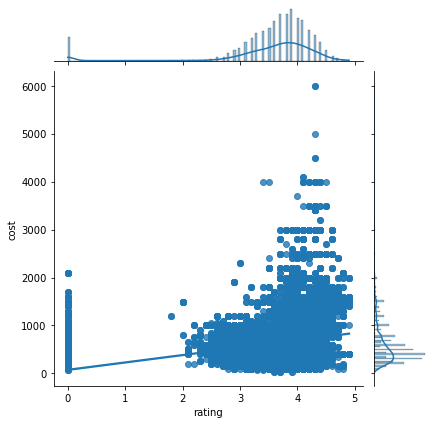

In [45]:
sns.jointplot(x = "rating", y ="cost", kind = "reg",data=zomato)

## Ratings:-

In [46]:
zomato.rating.describe()

count    30958.000000
mean         3.573687
std          0.874398
min          0.000000
25%          3.400000
50%          3.700000
75%          4.000000
max          4.900000
Name: rating, dtype: float64

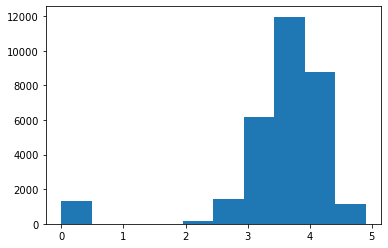

In [47]:
plt.hist(zomato.rating,bins=10)
plt.show()

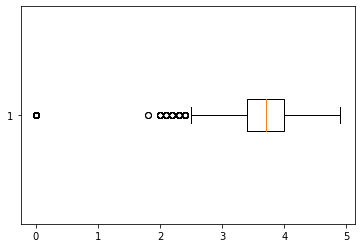

In [48]:
plt.boxplot(zomato.rating,vert=False)
plt.show()

In [49]:
IQR=zomato.rating.describe()['75%']-zomato.rating.describe()['25%']
L_LIM=zomato.rating.describe()['25%']-1.5*IQR
R_LIM=zomato.rating.describe()['75%']+1.5*IQR
print(L_LIM)
print(R_LIM)

2.5
4.9


## votes:-

In [50]:
zomato.votes.describe()

count    30958.000000
mean       407.242264
std        989.323822
min          0.000000
25%         20.000000
50%         81.000000
75%        334.000000
max      16832.000000
Name: votes, dtype: float64

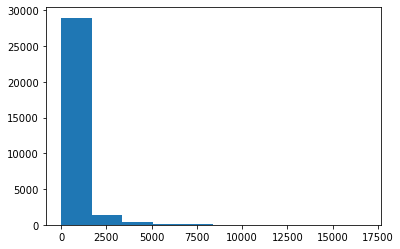

In [51]:
plt.hist(zomato.votes,bins=10)
plt.show()

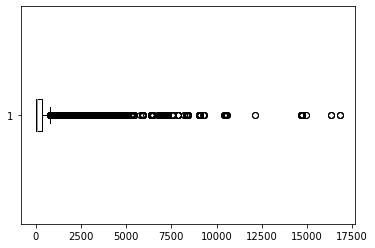

In [52]:
plt.boxplot(zomato.votes,vert=False)
plt.show()

In [53]:
IQR=zomato.votes.describe()['75%']-zomato.votes.describe()['25%']
L_LIM=zomato.votes.describe()['25%']-1.5*IQR
R_LIM=zomato.votes.describe()['75%']+1.5*IQR
print(L_LIM)
print(R_LIM)

-451.0
805.0


In [54]:
print("percntage of outliers is:",str((len([val for val in zomato.votes if val>R_LIM ])/zomato.votes.count())*100)+' %')

percntage of outliers is: 12.791524000258415 %


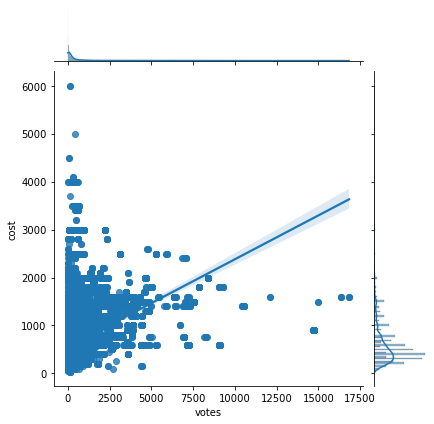

In [55]:
sns.jointplot(x = "votes", y ="cost", kind = "reg",data=zomato)

In [56]:
#zomato.votes=zomato.votes.replace([val for val in zomato.rating if val>R_LIM ],804)

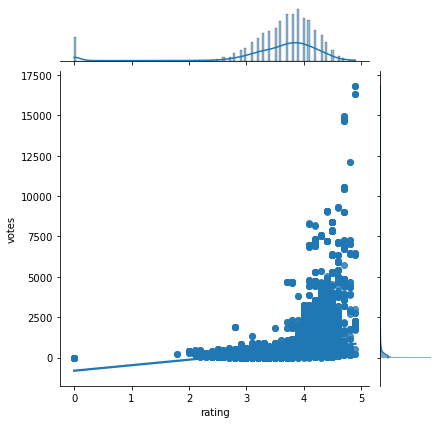

In [57]:
sns.jointplot(x = "rating", y ="votes", kind = "reg",data=zomato)

# Data visualization:-

In [58]:
zomato.types.value_counts()

Delivery              14159
Dine-out              11354
Desserts               2117
Cafes                  1184
Drinks & nightlife      894
Buffet                  665
Pubs and bars           585
Name: types, dtype: int64

In [59]:
zomato[['restaurant_name','types','location']][zomato.types == "Pubs and bars"]

,restaurant_name,types,location
4954,BG's Poolside Bar & Grill,Pubs and bars,Bellandur
4955,Tipsy Bull - The Bar Exchange,Pubs and bars,Bellandur
4956,Vapour Brewpub and Diner,Pubs and bars,Sarjapur Road
4957,The Irish House,Pubs and bars,Bellandur
4958,Chili's American Grill & Bar,Pubs and bars,Bellandur
...,...,...,...
51709,The Farm House Bar n Grill,Pubs and bars,Whitefield
51711,Bhagini,Pubs and bars,Whitefield
51712,Best Brews - Four Points by Sheraton Bengaluru...,Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,Pubs and bars,"ITPL Main Road, Whitefield"


In [60]:
zomato.head()

,restaurant_name,online_order,booking,rating,votes,location,rest_type,cuisines,cost,types
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [61]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30958 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   restaurant_name  30958 non-null  object 
 1   online_order     30958 non-null  object 
 2   booking          30958 non-null  object 
 3   rating           30958 non-null  float64
 4   votes            30958 non-null  int64  
 5   location         30958 non-null  object 
 6   rest_type        30958 non-null  object 
 7   cuisines         30958 non-null  object 
 8   cost             30958 non-null  int64  
 9   types            30958 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 3.6+ MB


<AxesSubplot:>

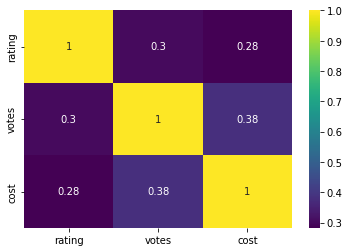

In [62]:
sns.heatmap(zomato.corr(), annot = True, cmap = "viridis")

# Model Preparation

In [63]:
zomato.head()

,restaurant_name,online_order,booking,rating,votes,location,rest_type,cuisines,cost,types
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [64]:
# deleting restaurant_name as it is uncessesary

In [65]:
del zomato['restaurant_name']

In [66]:
zomato.online_order.value_counts()

Yes    19818
No     11140
Name: online_order, dtype: int64

In [67]:
zomato.online_order.replace(['No','Yes'],[0,1], inplace=True)

In [68]:
zomato.booking.value_counts()

No     25572
Yes     5386
Name: booking, dtype: int64

In [69]:
zomato

,online_order,booking,rating,votes,location,rest_type,cuisines,cost,types
0,1,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,1,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,1,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,0,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,0,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...
51709,0,No,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,Pubs and bars
51711,0,No,2.5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,Pubs and bars
51712,0,No,3.6,27,Whitefield,Bar,Continental,1500,Pubs and bars
51715,0,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500,Pubs and bars


In [70]:
cleandata=pd.read_csv('C:\\Users\\Sambhu\\Desktop\\Imarticus\\Class Material\\kaggle\\cleandata.csv')

In [71]:
cleandata

,online_order,booking,rating,votes,location,rest_type,cuisines,cost,types
0,1,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,1,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,1,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,0,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,0,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...
30953,0,No,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,Pubs and bars
30954,0,No,2.5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,Pubs and bars
30955,0,No,3.6,27,Whitefield,Bar,Continental,1500,Pubs and bars
30956,0,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500,Pubs and bars


In [72]:
df=cleandata.loc[:,'rest_type']

In [73]:
df

0              Casual Dining
1              Casual Dining
2        Cafe, Casual Dining
3                Quick Bites
4              Casual Dining
                ...         
30953     Casual Dining, Bar
30954     Casual Dining, Bar
30955                    Bar
30956                    Bar
30957     Bar, Casual Dining
Name: rest_type, Length: 30958, dtype: object

In [74]:
 def dummy_creater(df,column_name):
    
    df1=df.loc[:,column_name]
    
    #converting into list
    l=[]
    temp=[]
    for i in df1:
        temp.append(i)
        l.append(temp.copy())
        temp.pop()
        
    # spliting into strings
    l1=[]
    for i in l:
        for j in i:
            #print(j)
            b=j.split(',')
            #print(b)

        l1.append(b.copy())
    
    ## removing space
    new=[]
    for i in l1:
        temp=[]
        for j in i:
            temp.append(j.strip())
        new.append(temp.copy())
        del(temp)
    
        
    # unique values/coloumn name
    unique=[]
    for i in new:
        for j in i:
            unique.append(j)
    unique_set=set(unique)
    unique_list=list(unique_set)
    couloun_names=unique_list
    
    #creating dummys
    store_list=[]
    for row in new:
        new_row=[]
        for element in couloun_names:
                if element in row :
                    new_row.append(1)
                else:
                    new_row.append(0)
        store_list.append(new_row.copy())
        del(new_row)
    df=pd.DataFrame(store_list,columns=couloun_names)
    
    return df

In [75]:
ff=dummy_creater(cleandata,'rest_type')


In [76]:
ff

,Mess,Dhaba,Sweet Shop,Cafe,Pub,Delivery,Kiosk,Dessert Parlor,Lounge,Food Court,Confectionery,Fine Dining,Takeaway,Microbrewery,Food Truck,Club,Bakery,Meat Shop,Irani Cafee,Bhojanalya,Quick Bites,Casual Dining,Bar,Beverage Shop
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
30954,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
30955,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
30956,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [77]:
zomato=pd.concat([cleandata,ff],1)

C:\Users\Sambhu\AppData\Local\Temp\ipykernel_29396\3552618208.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  zomato=pd.concat([cleandata,ff],1)


In [78]:
zomato.head()

,online_order,booking,rating,votes,location,rest_type,cuisines,cost,types,Mess,Dhaba,Sweet Shop,Cafe,Pub,Delivery,Kiosk,Dessert Parlor,Lounge,Food Court,Confectionery,Fine Dining,Takeaway,Microbrewery,Food Truck,Club,Bakery,Meat Shop,Irani Cafee,Bhojanalya,Quick Bites,Casual Dining,Bar,Beverage Shop
0,1,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [79]:
del zomato['cuisines']

In [80]:
del zomato['rest_type']

In [81]:
zomato.location.value_counts()

BTM                      2228
Indiranagar              1653
Whitefield               1630
Koramangala 5th Block    1577
HSR                      1558
                         ... 
Central Bangalore           5
Yelahanka                   4
Rajarajeshwari Nagar        2
Nagarbhavi                  1
Peenya                      1
Name: location, Length: 92, dtype: int64

In [82]:
zomato.location.unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'CV Raman Nagar', 'Electronic City', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Marathahalli', 'Koramangala 7th Block', 'Bellandur',
       'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'MG Road', 'Brigade Road', 'Lavelle Road',
       'Church Street', 'Ulsoor', 'Residency Road', 'Shivajinagar',
       'Infantry Road', 'St. Marks Road', 'Cunningham Road',
       'Race Course Road', 'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramanga

In [83]:
east = ['Banashankari', 'Basavanagudi', 'Jayanagar', 'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar', 'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market', 'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'Wilson Garden', 'Shanti Nagar', 'Koramangala 5th Block', 'Richmond Road', 'HSR', 'Marathahalli', 'Koramangala 7th Block', 'Bellandur', 'Sarjapur Road', 'Whitefield']
north = ['Mysore Road', 'Rajajinagar', 'RT Nagar', 'Banaswadi', 'Nagawara', 'Hennur', 'Kalyan Nagar', 'HBR Layout', 'Rammurthy Nagar', 'Thippasandra', 'Kaggadasapura', 'Hebbal', 'Kengeri', 'New BEL Road', 'Sankey Road', 'Malleshwaram', 'Sadashiv Nagar', 'Basaveshwara Nagar', 'Yeshwantpur']
south = ['Frazer Town', 'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road', 'St. Marks Road', 'Cunningham Road', 'Race Course Road', 'Commercial Street', 'Vasanth Nagar', 'Domlur', 'Ejipura', 'Jeevan Bhima Nagar', 'Old Madras Road', 'Seshadripuram', 'Kammanahalli', 'Koramangala 6th Block', 'Majestic', 'Langford Town', 'Central Bangalore', 'Sanjay Nagar', 'Brookefield', 'ITPL Main Road, Whitefield', 'Varthur Main Road, Whitefield']
west = ['Koramangala 2nd Block', 'Koramangala 3rd Block','Koramangala 8th Block',  'Koramangala 6th Block', 'Koramangala 1st Block', 'Koramangala 4th Block', 'West Bangalore','Koramangala', 'Hosur Road', 'Magadi Road', 'Yelahanka', 'Sahakara Nagar', 'Jalahalli', 'Nagarbhavi', 'Peenya', 'KR Puram']

In [84]:
zomato.location.replace(['Banashankari', 'Basavanagudi','East Bangalore', 'Jayanagar', 'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar', 'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market', 'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'Wilson Garden', 'Shanti Nagar', 'Koramangala 5th Block', 'Richmond Road', 'HSR', 'Marathahalli', 'Koramangala 7th Block', 'Bellandur', 'Sarjapur Road', 'Whitefield'],'east', inplace = True)

In [85]:
zomato.location.replace(['Mysore Road', 'Rajajinagar','North Bangalore', 'Indiranagar', 'RT Nagar', 'Banaswadi', 'Nagawara', 'Hennur', 'Kalyan Nagar', 'HBR Layout', 'Rammurthy Nagar', 'Thippasandra', 'Kaggadasapura', 'Hebbal', 'Kengeri', 'New BEL Road', 'Sankey Road', 'Malleshwaram', 'Sadashiv Nagar', 'Basaveshwara Nagar', 'Yeshwantpur'],'north', inplace=True)

In [86]:
zomato.location.replace(['Frazer Town', 'MG Road', 'Brigade Road', 'Lavelle Road', 'Old Airport Road', 'Church Street', 'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road', 'St. Marks Road', 'Cunningham Road', 'Race Course Road', 'Commercial Street', 'Vasanth Nagar', 'Domlur', 'Ejipura', 'Jeevan Bhima Nagar', 'Old Madras Road', 'Seshadripuram', 'Kammanahalli', 'Majestic', 'Langford Town', 'Central Bangalore', 'Sanjay Nagar', 'Brookefield', 'ITPL Main Road, Whitefield', 'Varthur Main Road, Whitefield', 'Whitefield'],'south',inplace=True)

In [87]:
zomato.location.replace([val for val in west],'west',inplace=True)

In [88]:
zomato.location.value_counts()

east     17213
south     6878
north     4800
west      2067
Name: location, dtype: int64

In [89]:
zomato.head()

,online_order,booking,rating,votes,location,cost,types,Mess,Dhaba,Sweet Shop,Cafe,Pub,Delivery,Kiosk,Dessert Parlor,Lounge,Food Court,Confectionery,Fine Dining,Takeaway,Microbrewery,Food Truck,Club,Bakery,Meat Shop,Irani Cafee,Bhojanalya,Quick Bites,Casual Dining,Bar,Beverage Shop
0,1,Yes,4.1,775,east,800,Buffet,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,No,4.1,787,east,800,Buffet,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,No,3.8,918,east,800,Buffet,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,No,3.7,88,east,300,Buffet,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,No,3.8,166,east,600,Buffet,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [90]:
zomato.booking.value_counts()

No     25572
Yes     5386
Name: booking, dtype: int64

In [91]:
zomato.types.value_counts()

Delivery              14159
Dine-out              11354
Desserts               2117
Cafes                  1184
Drinks & nightlife      894
Buffet                  665
Pubs and bars           585
Name: types, dtype: int64

In [92]:
zomato.drop(['types'], axis=1, inplace=True)

In [93]:
df_booking = pd.get_dummies(zomato.booking, drop_first=True, prefix = 'Booking')

In [94]:
zomato = pd.concat([df_booking,zomato], axis = 1)

In [95]:
del zomato['booking']

In [96]:
zomato.head()

,Booking_Yes,online_order,rating,votes,location,cost,Mess,Dhaba,Sweet Shop,Cafe,Pub,Delivery,Kiosk,Dessert Parlor,Lounge,Food Court,Confectionery,Fine Dining,Takeaway,Microbrewery,Food Truck,Club,Bakery,Meat Shop,Irani Cafee,Bhojanalya,Quick Bites,Casual Dining,Bar,Beverage Shop
0,1,1,4.1,775,east,800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,1,4.1,787,east,800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,1,3.8,918,east,800,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,3.7,88,east,300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,3.8,166,east,600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [97]:
zomato_dummies = pd.get_dummies(zomato.location, drop_first=True, prefix='loc')

In [98]:
zomato = pd.concat([zomato,zomato_dummies], axis=1)

In [99]:
zomato.drop(['location'], axis=1, inplace=True)

In [100]:
x = zomato.iloc[:,zomato.columns != 'cost']
y = zomato.iloc[:,zomato.columns == 'cost']

In [101]:
from sklearn.model_selection import train_test_split

In [103]:
x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(x,y, test_size=0.3, random_state=123)

In [104]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=123)

In [105]:
from sklearn.model_selection import RandomizedSearchCV

In [106]:
params = {'max_depth': [4,6,8,9,10,11,12,13,14], 'min_samples_split': [2,3,4],'max_features':['sqrt','log2',1]}

In [107]:
rgr = RandomizedSearchCV(rfr, params, n_iter=10, cv=5)

In [108]:
model1 = rgr.fit(x_train_rf,y_train_rf)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

In [109]:
model1.best_params_

{'min_samples_split': 3, 'max_features': 'sqrt', 'max_depth': 12}

In [110]:
model1.best_score_

0.8532414214023806

In [112]:
model1.score(x_train_rf,y_train_rf)

0.8751359994320974

In [113]:
rfr = RandomForestRegressor(n_estimators=100,n_jobs=-1, min_samples_split=3, max_features='sqrt',max_depth=12, oob_score=True, random_state=123)

In [114]:
model1 = rfr.fit(x_train_rf,y_train_rf)

C:\Users\Sambhu\AppData\Local\Temp\ipykernel_29396\2409530120.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model1 = rfr.fit(x_train_rf,y_train_rf)


In [115]:
y_pred_te_rf = model1.predict(x_test_rf)

In [116]:
model1.score(x_test_rf,y_test_rf)

0.8660641152075925

In [117]:
mean_squared_error(y_test_rf,y_pred_te_rf)

28495.01695048057

In [118]:
model1.oob_score_

0.8576515699533712

In [119]:
model1.feature_importances_

array([2.16106412e-01, 2.58520689e-02, 7.63583818e-02, 1.41726001e-01,
       3.40276896e-04, 5.68775274e-06, 1.13771767e-03, 1.95768057e-02,
       2.49985302e-02, 2.36756250e-03, 1.61411045e-04, 9.86222242e-03,
       5.22100438e-02, 2.34075006e-04, 6.83975562e-05, 1.40656778e-01,
       1.42054278e-03, 1.78415922e-02, 9.38319155e-06, 4.56465754e-03,
       1.62044975e-03, 4.12366634e-07, 3.41189630e-05, 0.00000000e+00,
       8.17097748e-02, 7.32119106e-02, 7.53937791e-02, 3.26583067e-03,
       3.06691230e-03, 2.36090543e-02, 2.58920882e-03])